In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir='disease/train' #i'm using local 
valid_dir='disease/valid'

In [ ]:
img_size  = 224
batch_size = 32

In [ ]:
image_gen_train = ImageDataGenerator(rescale = 1./255)

train_datagen = image_gen_train.flow_from_directory(batch_size = batch_size, 
                                                     directory = train_dir,
                                                     shuffle= True,
                                                     target_size = (img_size,img_size),
                                                     class_mode = 'categorical')

image_generator_validation = ImageDataGenerator(rescale=1./255)

val_datagen = image_generator_validation.flow_from_directory(batch_size=batch_size,
                                                              directory=valid_dir,
                                                              target_size=(img_size, img_size),
                                                              class_mode='categorical')

Found 9000 images belonging to 6 classes.
Found 1080 images belonging to 6 classes.


In [ ]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

In [ ]:
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False

input_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(6, activation='softmax')(x)

In [ ]:
model = tf.keras.Model(pre_trained_model.input, x)

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
vgg_classifier = model.fit(train_datagen,
steps_per_epoch=100,
epochs = 15, #this is only 15 epochs broo, i can't use GPU for training
validation_data=val_datagen,
batch_size = batch_size,
verbose = 1)

Epoch 1/15
100/100 [==============================] - 369s 4s/step - loss: 1.3882 - acc: 0.4773 - val_loss: 0.9453 - val_acc: 0.6713
Epoch 2/15
100/100 [==============================] - 363s 4s/step - loss: 0.9832 - acc: 0.6546 - val_loss: 0.6952 - val_acc: 0.7861
Epoch 3/15
100/100 [==============================] - 365s 4s/step - loss: 0.8038 - acc: 0.7109 - val_loss: 0.5681 - val_acc: 0.8194
Epoch 4/15
100/100 [==============================] - 374s 4s/step - loss: 0.6854 - acc: 0.7654 - val_loss: 0.4512 - val_acc: 0.8630
Epoch 5/15
100/100 [==============================] - 380s 4s/step - loss: 0.6386 - acc: 0.7781 - val_loss: 0.4100 - val_acc: 0.8667
Epoch 6/15
100/100 [==============================] - 373s 4s/step - loss: 0.5598 - acc: 0.8013 - val_loss: 0.3506 - val_acc: 0.8880
Epoch 7/15
100/100 [==============================] - 371s 4s/step - loss: 0.5014 - acc: 0.8391 - val_loss: 0.3103 - val_acc: 0.9028
Epoch 8/15
100/100 [==============================] - 361s 4s/step - 

Text(0.5, 1.0, 'Training and validation loss')

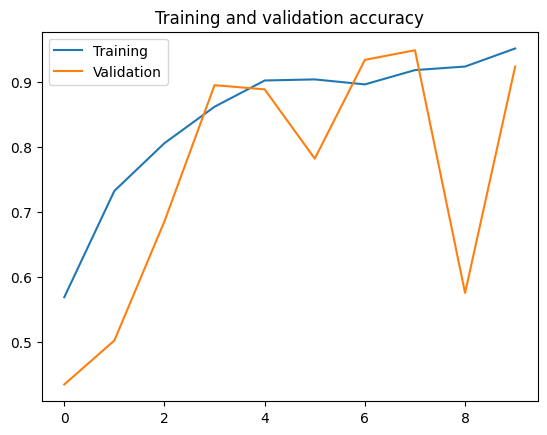

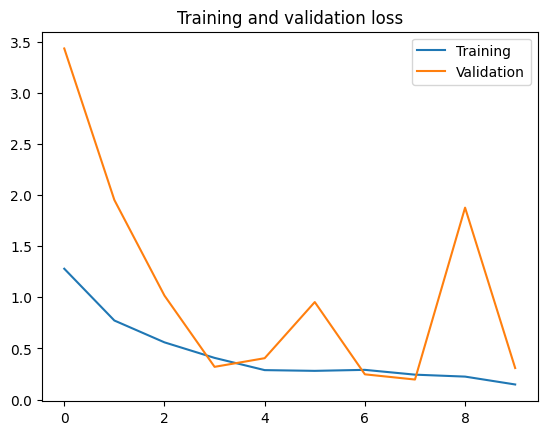

In [ ]:
acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history[ 'val_loss' ]

epochs   = range(len(acc))

plt.plot  ( epochs, acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs, loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')



In [ ]:
from tensorflow.keras.models import load_model 
model.save('disease_dogs.h5')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflowjs

In [6]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /content/drive/MyDrive/model/disease_dogs.h5 /content/drive/MyDrive/model/tfjs_model

2023-06-10 01:52:13.348710: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-10 01:52:14.471506: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
